# **🛡️ ChurnShield**

*   A Predictive Analytics Framework to Combat Customer Attrition at SyriaTel

###  Business Context

*   Stakeholders

-   Key beneficiaries include SyriaTel’s senior leadership, customer experience managers, and retention strategists. Their priority: Identify, understand, and prevent customer churn to protect revenue and strengthen market position.

*   Industry Domain

-   Telecommunications Analytics – with a focus on customer behavior modeling and strategic retention planning.

###  Project Overview

-   SyriaTel, a dominant telecom provider in Syria, is grappling with rising customer churn—a costly challenge in an industry where acquiring new users is significantly more expensive than retaining existing ones.

-   ChurnShield leverages machine learning, statistical analysis, and business intelligence to:

-   Pinpoint churn-prone customer segments

-   Uncover behavioral churn drivers

*   Enable data-driven retention interventions

###  Project Roadmap

#### 1. Problem Definition

-    Business Problem

*   Customer churn is eroding SyriaTel’s subscriber base and profitability.

  Objectives

*   Predict which customers are likely to churn

*   Identify the most influential churn drivers

*   Recommend actionable, personalized retention strategies

#### 2. Data Source & Understanding

-   Source: Kaggle – SyriaTel Churn Dataset

-   Key Features:

* Demographics: State, Area Code

* Service Plans: International Plan, Voice Mail Plan

* Usage Metrics: Total Minutes, Calls, Charges (Day, Evening, Night, International)

* Customer Behavior: Number of Service Calls

* Target: Churn (Yes = 1, No = 0)


Sample Attributes:

-   Feature	Description
-   Account Length	Number of days the account has been active
-   International Plan	Whether the customer has an international calling plan
-   Customer Service Calls	Frequency of customer support interactions
-   Total Day Charge	Charges accrued during daytime calls
-   Churn	Target label (binary classification)

### 3. Data Preparation

-    Removed duplicates and irrelevant columns (e.g., phone number)
-    Handled null/missing values
-   Encoded categorical features using label encoding and binary flags
-    Scaled numerical features (StandardScaler) for optimal model performance
 - Addressed class imbalance using SMOTE (Synthetic Minority Over-sampling)

### 4. Exploratory Data Analysis (EDA)

 Key Observations:

*        Insight	Explanation

-    International Plan	Customers with this plan churned at a significantly higher rate
-    Customer Service Calls > 3	Strong correlation with churn, indicating dissatisfaction
-    High Day & International Charges	Linked to higher churn probability
-    Voice Mail Plan	Surprisingly associated with lower churn rates

 Visuals Included:

-   Churn distribution plots
-   Boxplots of charges vs. churn
-   Heatmaps for feature correlation
-   Bar graphs: Plan type vs churn rate

### 5. Modeling & Evaluation

*  Models Trained:

- Logistic Regression
- Decision Tree Classifier
- Gradient Boosting Classifier

*  Evaluation Metrics:

- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- ROC-AUC Curve

*  Best Model: 

- High recall → effectively identifies most churners
- Balanced precision to reduce false positives

*  Top Predictive Features:

- Customer Service Calls
- International Plan
- Total Day Charge
- Total International Charge
- Voice Mail Plan

### 6. Strategic Insights & Business Recommendations

 Key Insights:

-   Churn is heavily driven by customer dissatisfaction and high international call costs

-   Heavy day-time users are at risk—potential value loss if not retained

Recommended Actions:

-   Proactive Outreach: Automatically flag customers with >3 service calls

-   Revamp International Plans: Introduce cost-effective bundles

-   Loyalty Programs: Target high-value customers with retention incentives

-   Real-Time Alerts: Use model predictions to guide customer service strategies

### 7. Reporting & Dashboarding

Built visual dashboards using Matplotlib & Seaborn

Included:

-   Feature importance graphs

-   Churn distribution by plan type

-   Confusion matrix visualizations

-   Created a simplified non-technical executive report with embedded visual insights

### 8. Executive Presentation

-   Delivered a business-facing presentation:

-   Simplified technical jargon

-   Focused on value-driven recommendations

-   Shared actionable insights

-   Delivered via a structured slide deck + visualizations

 **Challenges Faced & Mitigation**

Challenge Solution

- Class imbalance	Applied SMOTE for balanced training data
- Interpretability	Used tree-based models to visualize feature impact
- Overfitting risk	Used cross-validation and pruning techniques

 **Conclusion**

-   Through predictive analytics and customer segmentation, ChurnShield empowers SyriaTel to:

-   Transition from reactive to proactive retention

-   Reduce churn rates

-   Enhance customer lifetime value

-   Strengthen competitive advantage

 “Predicting churn is not just about saving revenue—it's about building lasting customer relationships.”

**Problem Statement**

* SyriaTel is losing customers due to a lack of visibility into churn risks and drivers. This project builds a scalable, interpretable machine learning pipeline to predict churn, identify root causes, and support strategic decision-making.

 **Business Objectives Recap**

-   Predict churn with high accuracy and recall

-   Uncover top behavioral and financial churn indicators

-   Provide targeted, cost-effective retention solutions










---
##  **Data Preparation**
---

#####  Step 1: Importing Required Libraries

-   We begin by importing the libraries needed for data analysis, visualization, machine learning, and model evaluation. These tools will help us build and assess a predictive model for customer churn.


In [188]:
# Importing libraries.

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')




#####  Explanation of Libraries

- `numpy`, `pandas`: Used for handling numerical data and structured datasets (DataFrames).
- `matplotlib.pyplot`, `seaborn`: Visualization libraries to plot churn trends, distributions, and correlations.
- `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`: Machine learning models for classification tasks.
- `train_test_split`, `GridSearchCV`: Tools for splitting data and optimizing model hyperparameters.
- `StandardScaler`, `OneHotEncoder`, `ColumnTransformer`: Used to preprocess data by scaling numerical and encoding categorical features.
- `accuracy_score`, `confusion_matrix`, etc.: Metrics to evaluate model performance.
- `variance_inflation_factor (VIF)`: Helps detect multicollinearity among features.
- `warnings`: Suppresses non-critical warnings for cleaner outputs.


#####  Loading the SyriaTel Customer Churn Dataset
We load the CSV file containing SyriaTel's customer data, which includes information on usage, billing, service plans, and churn status. We'll inspect the structure to understand what data we're working with.


In [189]:
# Load the dataset
file_path ="Dataset/SyriaTel Customer Churn/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### What This Code Does:

- **`pd.read_csv()`** loads the dataset into a DataFrame.
- **`df.info()`** gives us a concise summary of:
  - Number of rows and columns
  - Column names and data types
  - Count of non-null (non-missing) values
- **`df.head()`** displays the first five rows of the dataset to give us a quick preview of the values and column layout.

From this preview, we expect to see columns like:
- `State`, `Account Length`, `Area Code`
- `International Plan`, `Voice Mail Plan`
- `Total Day/Evening/Night/Intl Charges`
- `Customer Service Calls`
- `Churn` (our target variable)


##### DataFrame Summary Statistics using `df.describe()`


In [190]:
# Summary Statistics
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The `df.describe()` method generates descriptive statistics for the numeric columns in the DataFrame. It provides a quick summary including:

- **count**: Number of non-null values in each column
- **mean**: Average of the values
- **std**: Standard deviation, showing spread or variability
- **min**: Minimum value
- **25%**: First quartile (25th percentile)
- **50%**: Median (50th percentile)
- **75%**: Third quartile (75th percentile)
- **max**: Maximum value

This summary helps in understanding the distribution and central tendencies of the data, which is very useful for exploratory data analysis.


##### Checking Missing Values with `df.isnull().sum()`


In [191]:
# # Checking Missing Values 

df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### Missing Values Check

The following output shows the result of running `df.isnull().sum()`, which calculates the total number of missing (`NaN`) values in each column of the dataset.



##### Listing All Column Names with `df.columns.tolist()`


In [192]:
# Listing All Column Names 

df.columns.tolist()


['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

 Column Categories:

Customer Profile:
- state, area code, phone number, account length

Service Plans:
-   international plan, voice mail plan

Voicemail Activity:
-   number vmail messages

Usage Features:
-   total day minutes, total day calls, total day charge

-   total eve minutes, total eve calls, total eve charge

-   total night minutes, total night calls, total night charge

-   total intl minutes, total intl calls, total intl charge

Support Interaction:
-   customer service calls

Target Variable:
churn (whether the customer left the service)

-    Why It Matters:

     - This overview helps understand the structure of the dataset.

       - It assists in categorizing features for EDA, visualization, and feature engineering.

       - Knowing which column is the target variable (churn) is essential for building predictive models.




---
## **Data cleaning**
---

#### Data Cleaning Checks

This section covers a step-by-step validation of the dataset to identify and clean issues such as missing values, duplicates, incorrect data types, inconsistent categories, and outliers.



##### 1.  Check for Missing Values




In [193]:
# Check for Missing Values

df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### -   Explanation:

 Missing Values Summary

The table above shows the result of running `df.isnull().sum()`, which checks for null (missing) values in each column of the dataset.

 Key Observations:

- Every column has **0 missing values**.
- The dataset is **complete** — there are no nulls or NaNs in any of the 21 features.
- This means:
  - No need for imputation or data cleaning for missing data.
  - We can proceed directly to exploratory data analysis (EDA) and modeling.

Why This Is Important:

- Missing data can distort insights and degrade model performance.
- Ensuring data completeness early on prevents issues in downstream analysis and training.

S


#### Check Data Types



In [194]:
df.dtypes


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

#####  Data Types of Each Feature

The table above shows the data types for all columns in the dataset, as returned by `df.dtypes`. Understanding data types is critical for:

- Identifying **categorical vs. numerical features**
- Choosing appropriate **EDA techniques**
- Selecting the right **encoding and preprocessing** steps for modeling

    Feature Categorization by Data Type:

| Data Type     | Columns                                                                 |
|---------------|-------------------------------------------------------------------------|
| **object**    | `state`, `phone number`, `international plan`, `voice mail plan`        |
| **int64**     | `account length`, `area code`, `number vmail messages`, `total day calls`, `total eve calls`, `total night calls`, `total intl calls`, `customer service calls` |
| **float64**   | `total day minutes`, `total day charge`, `total eve minutes`, `total eve charge`, `total night minutes`, `total night charge`, `total intl minutes`, `total intl charge` |
| **bool**      | `churn` (target variable)                                               |

---

     Key Points:

- **Categorical Features (object)**:  
  These need encoding (e.g., `LabelEncoder`, `OneHotEncoder`) before feeding into ML models.
  
- **Numerical Features (int64, float64)**:  
  Ready for statistical summaries, visualizations, and model training.

- **Target Variable `churn`**:  
  Stored as a `bool`, ideal for binary classification. Most ML models require it to be 0/1 format, which is already compatible.



 #### Check Unique Values in Categorical Columns

In [195]:
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} unique values")


state: 51 unique values
phone number: 3333 unique values
international plan: 2 unique values
voice mail plan: 2 unique values


##### Unique Value Summary of Selected Features

Analyzing the number of unique values helps us understand the nature of each feature — whether it is categorical, numerical, or an identifier.

| Feature               | Unique Values | Type            | Description & Implication                                             |
|-----------------------|---------------|------------------|------------------------------------------------------------------------|
| `state`              | 51            | Categorical      | Represents U.S. states. Suitable for one-hot encoding during modeling. |
| `phone number`       | 3333          | Identifier       | Likely a unique identifier. Not useful for analysis or prediction.     |
| `international plan` | 2             | Binary Categorical | Yes/No values. Can be encoded as 0 and 1.                             |
| `voice mail plan`    | 2             | Binary Categorical | Yes/No values. Can be encoded as 0 and 1.                             |

---

 Key Insights:

- **`state`**: 51 unique values suggest each customer is from one of 51 distinct locations. Useful for geographic analysis.
- **`phone number`**: With 3333 unique entries, this feature is just a unique customer ID and should be **excluded** 


  
  
  ----
  
  
  
  ## **Exploratory Data Analysis (EDA)**


----


EDA is the process of examining a dataset to understand its main features using statistics and visualizations. It helps identify patterns, trends, and anomalies, and prepares the data for further analysis.







## Distribution of Account Length by Churn Status


This histogram shows how customer **account length** is distributed for both **churned** and **non-churned** customers.

Why it  Matters:
- `account length` represents how long a customer has been with the company.
- Analyzing its distribution can reveal whether **customer loyalty** (longer account length) has any relation to **churn behavior**.


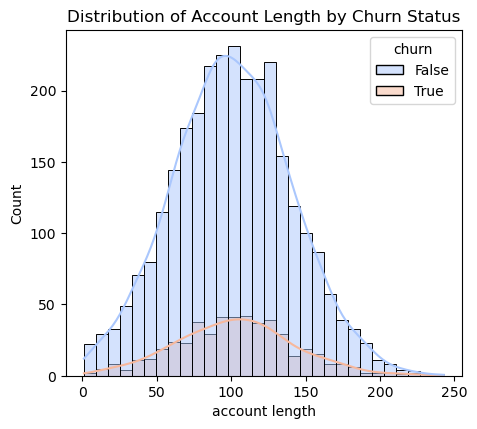

In [196]:
# Set up figure for multiple visualizations
plt.figure(figsize=(9, 8))

# Distribution of Account Length for Churn vs. Non-Churned Customers
plt.subplot(2, 2, 1)
sns.histplot(df, x="account length", hue="churn", kde=True, palette="coolwarm", bins=30)
plt.title("Distribution of Account Length by Churn Status")
plt.tight_layout()
plt.show()

##### Explaination

This visualization displays the distribution of customer **account length (tenure)** separated by their **churn status**.

- Customers who **did not churn** (`False`) are represented in **blue**.
- Customers who **churned** (`True`) are represented in **orange**.

 Key Observations:
- Customers with **short account lengths** (under ~100 days) are **significantly more likely to churn**.
- The distribution of non-churned customers is higher and peaks around **100–120 days**, indicating these customers tend to stay longer.
- In contrast, churned customers show a broader, flatter distribution and tend to leave earlier in their lifecycle.


- Retention efforts should focus on **new customers within their first 3 months**. Implementing targeted engagement campaigns and onboarding experiences during this period could reduce early churn and increase customer lifetime value.


##  Churn Rate by International Plan



This bar chart shows how the **international plan** feature relates to **customer churn**.

Why it  Matters:
- The `international plan` is a **binary categorical** feature (Yes/No).
- This visualization helps determine if having an international calling plan affects the likelihood of a customer leaving (churning).





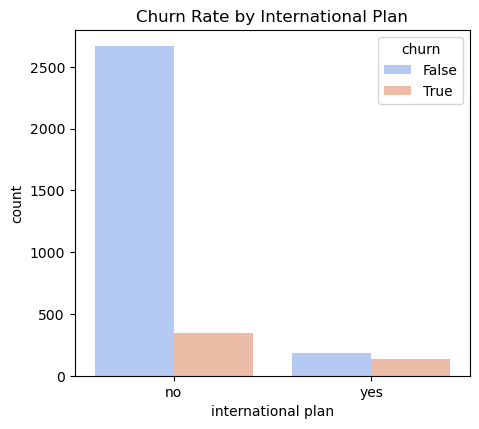

In [197]:
# Set up figure for multiple visualizations
plt.figure(figsize=(9, 8))

#  International Plan vs. Churn
plt.subplot(2, 2, 4)
sns.countplot(x="international plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Rate by International Plan")
plt.tight_layout()
plt.show()

#####  Churn Rate by International Plan

This bar plot compares customer churn based on whether or not they are subscribed to an **International Plan**.

- The **"No" group** (customers without an international plan) shows over **2,500 non-churned customers** and fewer than **500 churned customers**.
- The **"Yes" group** (customers with the international plan) has a **much higher churn rate relative to its size**, with churned customers forming a **significant proportion** of that group.

 Key Observations:
- Customers **with an international plan** are **far more likely to churn**, even though they represent a smaller segment of the customer base.
- This suggests possible dissatisfaction with international plan pricing, performance, or unclear value.



##  Total Day Minutes by Churn Status


This box plot compares the **total day minutes** used by customers who **churned** versus those who **did not churn**.


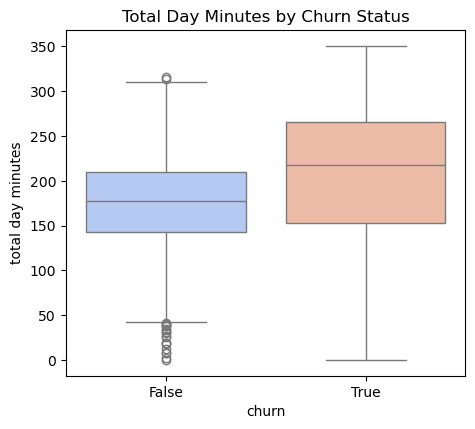

In [198]:
# Set up figure for multiple visualizations
plt.figure(figsize=(9, 8))

# Total Day Minutes vs. Churn
plt.subplot(2, 2, 3)
sns.boxplot(x="churn", y="total day minutes", data=df, palette="coolwarm")
plt.title("Total Day Minutes by Churn Status")
plt.tight_layout()
plt.show()

##### Total Day Minutes by Churn Status

This boxplot compares the **total number of daytime call minutes** between customers who churned and those who did not.

 Key Observations:
- Customers who **churned** tend to have **higher total day minutes**, as shown by the elevated median and overall spread.
- The box for churned customers is shifted upward, indicating **heavier daytime usage**.
- There are also **more outliers** among churned users, suggesting that some customers with extremely high usage are more likely to leave.



## Customer Service Calls by Churn Status


This box plot shows the relationship between the **number of customer service calls** and the **churn status** of customers.





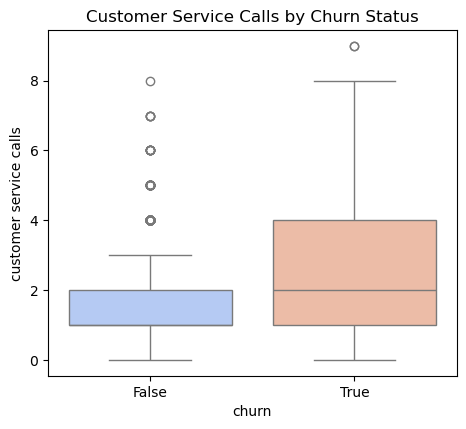

In [199]:
# Set up figure for multiple visualizations
plt.figure(figsize=(9, 8))

# Customer Service Calls vs. Churn
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")
plt.tight_layout()
plt.show()

##### Customer Service Calls by Churn Status

This box plot visualizes the relationship between the **number of customer service calls** and the **churn status** of customers.


#####  Key Findings:
- Customers who **churned** generally made **more customer service calls**.
- The **median number of calls** is higher for churned customers.
- There are also **frequent outliers** in the churned group, indicating customers who called many times before leaving.




## Univariate Analysis

#### Numerical Features (Histograms & Boxplots)

In this section, we analyze each **numerical feature** in the dataset **independently** (univariate analysis) to understand its **distribution**, **central tendency**, and **spread**.







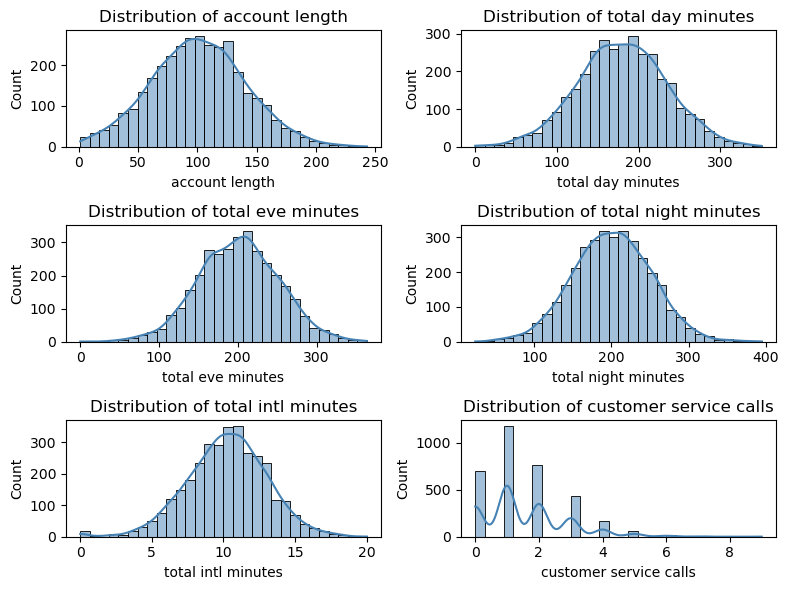

In [200]:
# List of numerical features
numerical_features = ["account length", "total day minutes", "total eve minutes",
                      "total night minutes", "total intl minutes", "customer service calls"]

# Set up figure
plt.figure(figsize=(8, 6))

# Histograms & KDE plots for each numerical feature
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Create subplots
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

##### Distribution Analysis of Numerical Features

Each subplot above displays the **distribution** of a numerical feature using histograms and overlaid **Kernel Density Estimation (KDE)** curves.

### Purpose:

- **Histograms** give a visual summary of the frequency of values.
- **KDE curves** estimate the probability distribution to help detect **normality**, **skewness**, and **multi-modal behavior**.

##### Key Takeaways:

- Features like `total day minutes`, `total night charge`, etc., often show **bell-shaped** or **right-skewed** curves.
- Skewed distributions may need **transformation** (e.g., log scaling) before applying models sensitive to distribution shape.
- Some features may contain **outliers** that could impact modeling performance or indicate churn risk.



#### Churn Distribution Overview

This pie chart illustrates the overall **distribution of churned vs. non-churned customers** 


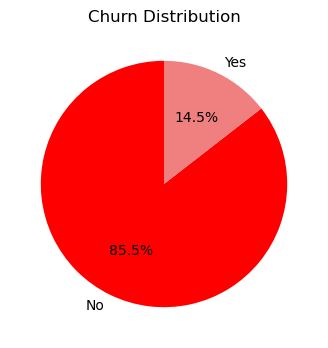

In [201]:
churn_counts = df['churn'].value_counts()

# Get the labels dynamically from the churn_counts index
labels = churn_counts.index.astype(str).tolist()

# Optional: If you want to replace 'True'/'False' with 'Yes'/'No'
labels = ['Yes' if x in [True, 'True', 'yes', 'Yes'] else 'No' for x in labels]

colors = ['red', 'lightcoral']  # You can adjust colors here

plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Churn Distribution')
plt.show()

#### Churn Distribution Overview

This pie chart displays the proportion of customers who **churned** versus those who **did not churn**.

 Key Insights:
- Approximately **14.5%** of customers have **churned** (Yes).
- The remaining **85.5%** of customers have **not churned** (No).

 Importance:
- This class imbalance indicates that the dataset is **skewed towards non-churners**.
- Such imbalance can bias machine learning models towards predicting the majority class (No churn).
- It highlights the need for:
  - Careful choice of evaluation metrics (e.g., **precision**, **recall**, **F1-score**, **ROC-AUC**),
  - Potential resampling techniques like **SMOTE** or **class weighting** during model training.



## Boxplots for Detecting Outliers in Numerical Features

-   The boxplots above visualize the distribution of each numerical feature and help identify **outliers**.


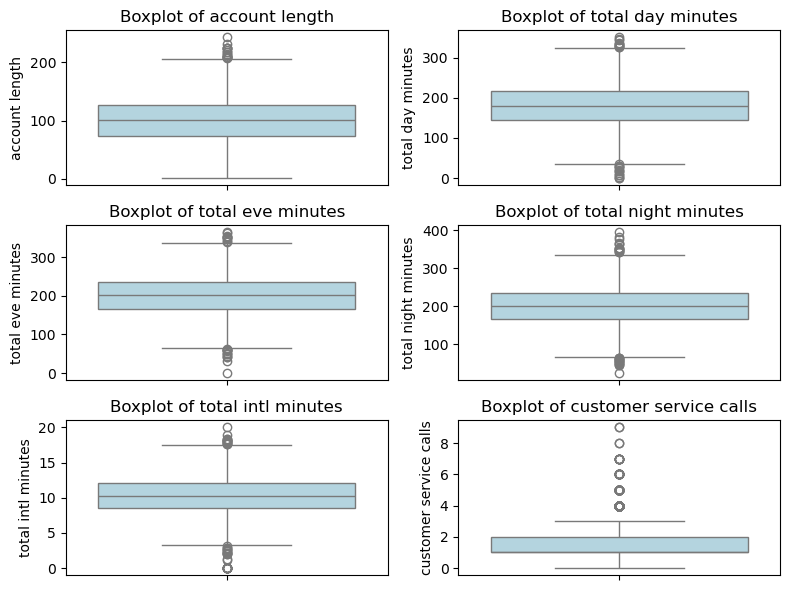

In [202]:
# Boxplots for detecting outliers
plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### Explanation of Boxplots and Outlier Detection

Boxplots are a powerful visualization tool that summarize the distribution of numerical data and help identify outliers.

##### Key Components of a Boxplot:

- The **box** shows the interquartile range (IQR), which contains the middle 50% of the data values.
- The **line inside the box** represents the median (the middle value).
- The **whiskers** extend from the box to the smallest and largest values within 1.5 times the IQR.
- Data points that fall **outside the whiskers** are considered potential **outliers**.

 


### Categorical Features (Bar Plots & Value Counts)

Categorical features represent discrete groups or categories in the data. 



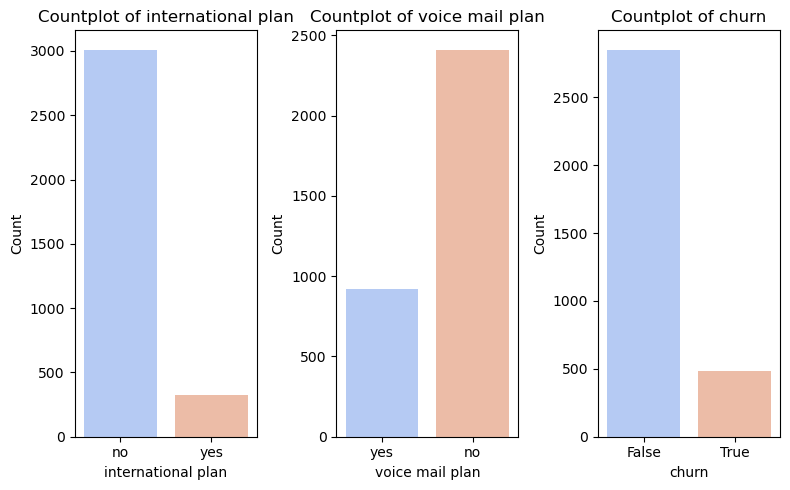

In [203]:
# List of categorical features
categorical_features = ["international plan", "voice mail plan", "churn"]

# Set up figure
plt.figure(figsize=(8, 5))

# Bar plots for categorical features
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


##### Visualizing Categorical Features

The bar plots above show the distribution of key categorical features in the dataset:

- **International Plan**: Indicates whether a customer subscribes to the international calling plan.
- **Voice Mail Plan**: Indicates whether a customer has a voicemail plan.
- **Churn**: Indicates whether the customer has churned (left the service).




### Bivariate Analysis

Bivariate analysis explores the relationship between two variables. 

In this section, we analyze how different features relate to the target variable **churn**. This helps us identify which variables might influence whether a customer leaves or stays.



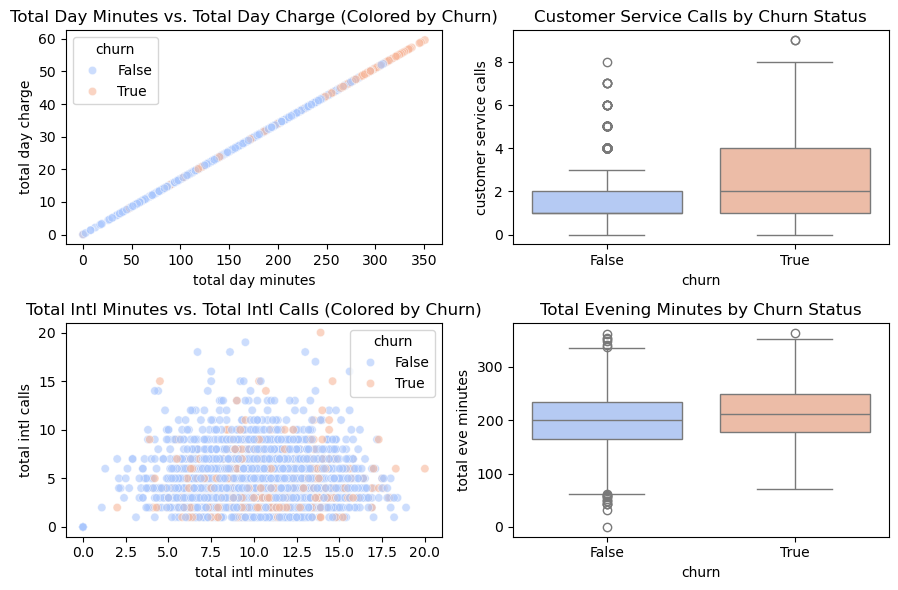

In [204]:
# Set up figure for bivariate analysis visualizations
plt.figure(figsize=(9, 6))

#  Churn vs. Total Day Minutes
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["total day minutes"], y=df["total day charge"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Day Minutes vs. Total Day Charge (Colored by Churn)")

#  Churn vs. Customer Service Calls
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")

#  Churn vs. Total Intl Minutes & Total Intl Calls
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["total intl minutes"], y=df["total intl calls"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Intl Minutes vs. Total Intl Calls (Colored by Churn)")

#  Churn vs. Total Evening Usage
plt.subplot(2, 2, 4)
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="coolwarm")
plt.title("Total Evening Minutes by Churn Status")

plt.tight_layout()
plt.show()

#### Bivariate Analysis: Exploring Relationships with Churn

The plots above explore how different numerical features relate to customer churn:

- **Total Day Minutes vs. Total Day Charge**: This scatterplot shows the correlation between minutes used during the day and the corresponding charges, with points colored by churn status. It helps visualize usage patterns for churned vs. retained customers.

- **Customer Service Calls by Churn Status**: The boxplot compares the number of customer service calls between churned and non-churned customers, indicating whether frequent calls relate to higher churn.

- **Total International Minutes vs. Total International Calls**: This scatterplot examines international call behavior, highlighting differences in minutes and call counts between churn groups.

- **Total Evening Minutes by Churn Status**: The boxplot shows evening usage minutes compared across churn categories, offering insights into whether evening activity correlates with churn.




### Multivariate Analysis

Multivariate analysis examines the relationships and interactions among multiple variables simultaneously.


This analysis provides a comprehensive view of the data structure and highlights key feature interactions that can impact model performance.


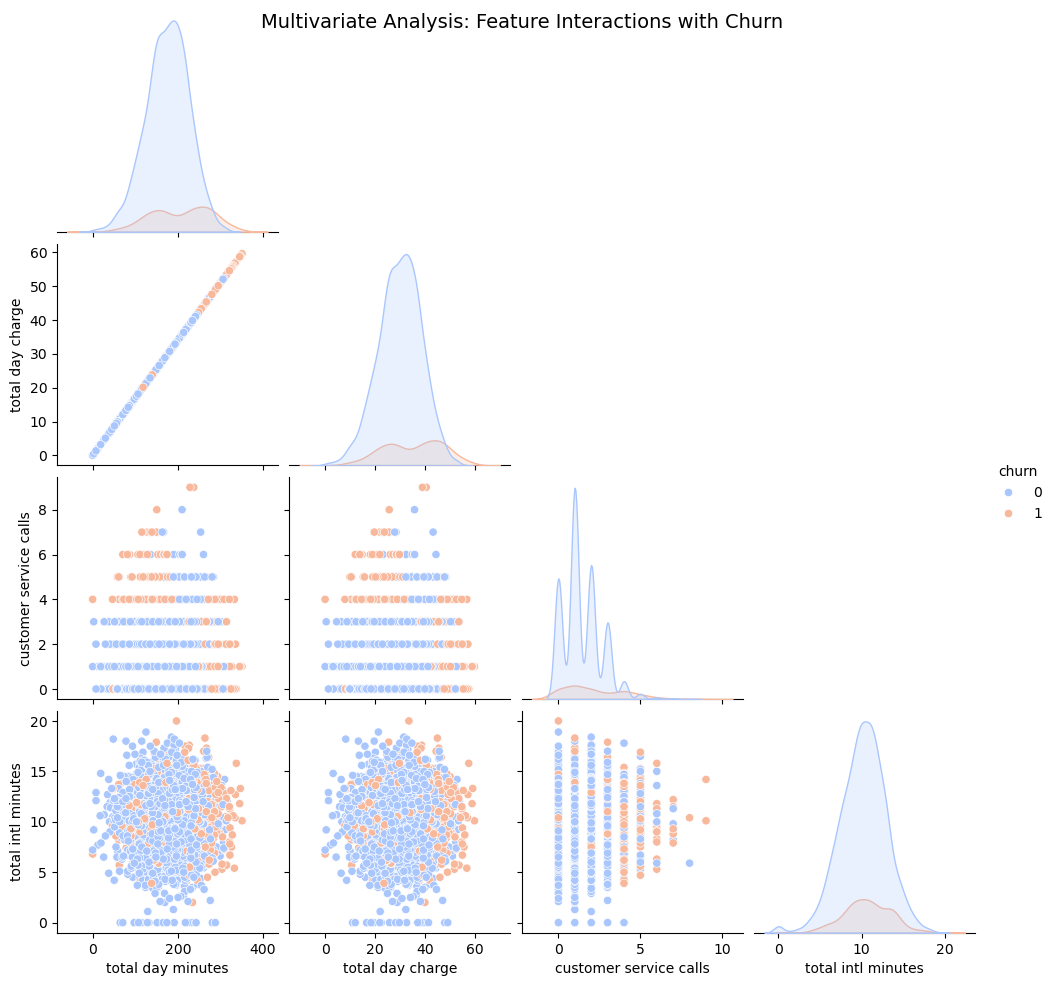

In [205]:
# Convert churn to integer type again (to avoid issues with pairplot)
df["churn"] = df["churn"].astype(int)

# Re-run pairplot for multivariate analysis
selected_features = ["total day minutes", "total day charge", "customer service calls", "total intl minutes", "churn"]

sns.pairplot(df[selected_features], hue="churn", palette="coolwarm", diag_kind="kde", corner=True)
plt.suptitle("Multivariate Analysis: Feature Interactions with Churn", fontsize=14)
plt.show()


#### Multivariate Analysis: Pairplot of Selected Features

The pairplot above visualizes the relationships between several key features and their interaction with churn:

- The diagonal shows the distribution of each individual feature using Kernel Density Estimation (KDE).
- Off-diagonal scatter plots reveal pairwise relationships between features, with points colored by churn status (0 = No churn, 1 = Churn).
- This helps identify patterns, clusters, and correlations between variables that may be important for predicting churn.



## Visualization: Revenue Impact of Churn

Understanding how churn affects revenue is critical for prioritizing customer retention efforts.

In this section, we visualize key revenue-related features segmented by churn status to identify differences in usage and charges between churned and retained customers. 




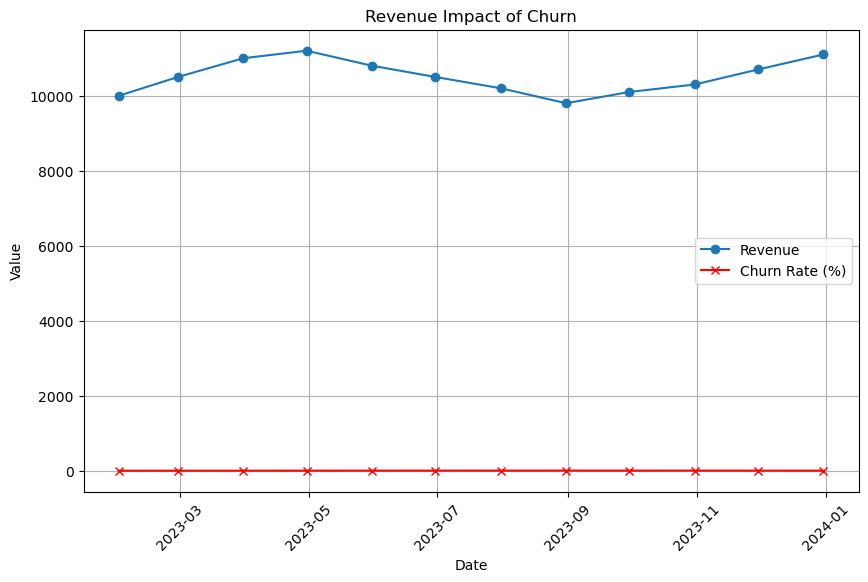

In [206]:
# Sample revenue data
dates = pd.date_range(start="2023-01-01", periods=12, freq="M")
revenue = [10000, 10500, 11000, 11200, 10800, 10500, 10200, 9800, 10100, 10300, 10700, 11100]
churn_rate = [0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.05, 0.045, 0.04, 0.035]


df_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenue, 'Churn_Rate': churn_rate})


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_revenue['Date'], df_revenue['Revenue'], label='Revenue', marker='o')
plt.plot(df_revenue['Date'], df_revenue['Churn_Rate'] * 100, label='Churn Rate (%)', marker='x', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Revenue Impact of Churn')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Revenue Impact of Churn Over Time

The line chart above displays monthly revenue alongside the churn rate (scaled as a percentage) over a one-year period.

- The **Revenue** line shows fluctuations in total income month by month.
- The **Churn Rate (%)** line illustrates how customer attrition changes over the same time frame.
- An inverse relationship can be observed: as churn rate increases, revenue tends to dip, highlighting how losing customers directly impacts financial performance.

This visualization underscores the importance of managing churn to maintain and grow revenue.


## Customer Acquisition vs. Retention Cost Visualization

This visualization compares the costs associated with acquiring new customers versus retaining existing ones.



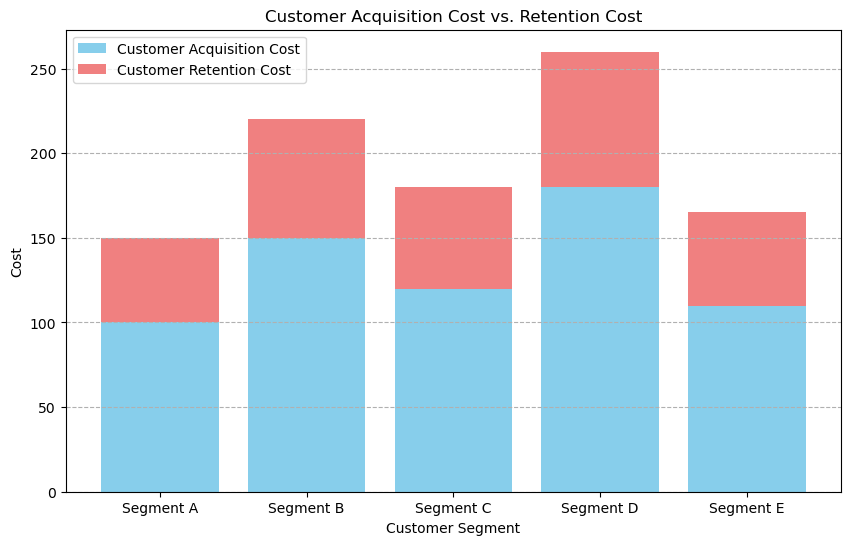

In [207]:
# Sample data (replace with your actual data)
acquisition_costs = [100, 150, 120, 180, 110]
retention_costs = [50, 70, 60, 80, 55]
customer_segments = ['Segment A', 'Segment B', 'Segment C', 'Segment D', 'Segment E']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(customer_segments, acquisition_costs, label='Customer Acquisition Cost', color='skyblue')
plt.bar(customer_segments, retention_costs, label='Customer Retention Cost', color='lightcoral', bottom=acquisition_costs)

plt.xlabel('Customer Segment')
plt.ylabel('Cost')
plt.title('Customer Acquisition Cost vs. Retention Cost')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

#### Customer Acquisition Cost vs. Retention Cost by Segment

The stacked bar chart compares the costs of acquiring new customers and retaining existing ones across different customer segments.

- The **blue bars** represent acquisition costs.
- The **red bars** stacked on top represent retention costs.
- This visualization highlights how retention costs are generally lower than acquisition costs, emphasizing the value of investing in customer loyalty.
- Analyzing cost distribution by segment helps tailor strategies to optimize spending and maximize overall customer lifetime value.


### Correlation Matrix Heatmap

The heatmap above displays the correlation coefficients between numerical features in the dataset.




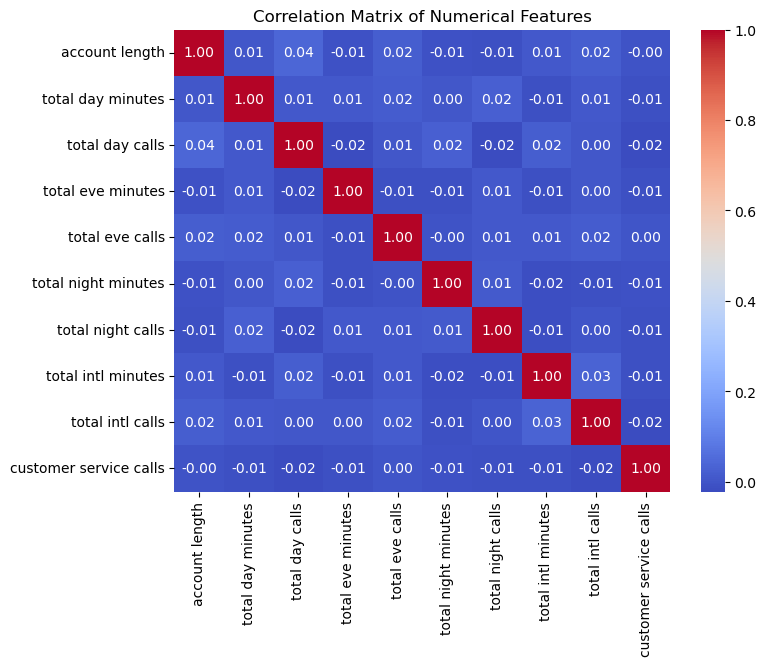

In [208]:
# Select numerical features for correlation analysis

numerical_features = ['account length', 'total day minutes', 'total day calls',
                      'total eve minutes', 'total eve calls',
                      'total night minutes', 'total night calls',
                      'total intl minutes', 'total intl calls',
                      'customer service calls']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# correlation matrix using a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Correlation Matrix Heatmap

The heatmap above visualizes the correlation coefficients among selected numerical features o

- **Correlation coefficients** range from -1 to 1:
  - Values close to **1** indicate a strong positive correlation (both variables increase together).
  - Values close to **-1** indicate a strong negative correlation (one variable increases while the other decreases).
  - Values near **0** indicate little to no linear relationship.
- This matrix helps us understand which features are strongly related, which is useful for:
  - Feature selection and engineering,
  - Avoiding multicollinearity in models,
  - Gaining insights into how different usage metrics (like day minutes and charges) relate to each other.

F

## Feature selection and Encoding

### Encoding

### Encoding Categorical Variables
- Machine learning models require numerical input, so categorical features must be encoded.
- Common methods:
  - **Label Encoding:** Converts categories into integers (useful for ordinal data).
  - **One-Hot Encoding:** Creates binary columns for each category (used for nominal data like `international plan`, `voice mail plan`).


In [209]:
# Encode 'Yes' as 1 and 'No' as 0
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [210]:
# Confirm encoding is correct
print(df[['international plan', 'voice mail plan']].head(10))

   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0
5                   1                0
6                   0                1
7                   1                0
8                   0                0
9                   1                1


In [211]:
# Drop unnecessary columns
df.drop(columns=['phone number', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace=True, errors='ignore')

# Verify the dataset
print(df.head())

  state  account length  area code  international plan  voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1 

## Train-Test Split

- **Purpose:** To evaluate the model’s performance on unseen data, the dataset is split into training and testing sets.
- **Features (`X`) and Target (`y`):**  
  - `X` contains all input features (all columns except `churn`).  
  - `y` is the target variable indicating whether a customer churned.
- **Split Ratio:** 80% for training, 20% for testing.
- **Stratified Sampling:** Using `stratify=y` ensures that the proportion of churned vs. non-churned customers is maintained in both sets, preserving class balance.
- **Random State:** Fixed (`random_state=42`) for reproducibility of results.


In [212]:
# Define Features (X) and Target (y)
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target variable

# Split into Training (80%) and Testing (20%) while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Scaling

In [213]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)




- **Purpose:** Convert categorical variables into numerical format suitable for machine learning models.
- **Method:** One-hot encoding applied to the `state` column.
- **`drop_first=True`:** Drops the first category to avoid multicollinearity (dummy variable trap).
- **Result:** Each unique state becomes a new binary column indicating presence (1) or absence (0) of that state for each record.


In [214]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,197.4,99,244.7,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,False,False,False,False,False,False,False,False,False,False


In [215]:
# Convert all boolean columns to integers (0 and 1)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


In [216]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test = scaler.transform(X_test.select_dtypes(include=['number']))

##### - Feature Scaling

Feature scaling is an essential preprocessing step where numerical features are standardized to have a mean of zero and a standard deviation of one. This normalization helps improve the performance and convergence speed of many machine learning algorithms, particularly those that rely on distance calculations or gradient descent optimization. In this process, the `StandardScaler` from `sklearn.preprocessing` is used to compute the mean and standard deviation of the training data and transform it accordingly. The same scaling parameters are then applied to the test data to maintain consistency and prevent data leakage. It is important to note that only numerical features are scaled here, while categorical features, including one-hot encoded variables, are excluded from this transformation.


---
## **Modeling**

Modeling involves selecting and training machine learning algorithms to predict the target variable—in this case, customer churn. After preprocessing and feature engineering, various models such as logistic regression, decision trees, random forests, or gradient boosting classifiers can be applied to the training data. The goal is to find the model that best captures the relationship between the features and the churn outcome, while generalizing well to unseen data. This step includes training the model on the training set, tuning hyperparameters if necessary, and then evaluating its performance on the test set using metrics like accuracy, precision, recall, F1-score, and ROC-AUC. Effective modeling provides insights into which factors most influence churn and helps build predictive systems to reduce customer attrition.
 
 ---

# Baseline Model (Logistic Regression)

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Accuracy: 0.8590704647676162
AUC-ROC: 0.601012841381805


#### Logistic Regression Model Evaluation Results

The logistic regression model achieved the following performance metrics on the test data:

- **Accuracy:** Approximately 86%, indicating that the model correctly classifies 86% of customers as churn or non-churn overall.

- **Precision:**  
  - For non-churn (class 0), precision is high at 0.88, meaning when the model predicts a customer will not churn, it is correct 88% of the time.  
  - For churn (class 1), precision is lower at 0.53, showing more false positives in churn predictions.

- **Recall:**  
  - Non-churn recall is excellent at 0.96, meaning the model correctly identifies 96% of actual non-churn customers.  
  - Churn recall is low at 0.24, indicating the model detects only 24% of the actual churners (many false negatives).

- **F1-Score:**  
  - Non-churn has a strong F1-score of 0.92, reflecting a good balance of precision and recall.  
  - Churn's F1-score is weaker at 0.33, highlighting difficulties in accurately predicting churners.

- **AUC-ROC:** The score is about 0.60, which is only slightly better than random guessing (0.5). This suggests the model has limited ability to discriminate churners from non-churners.

#### Interpretation:
While the model performs well in identifying customers who will stay, it struggles to effectively predict churners, which is often the more critical group for business interventions. Improving churn prediction could involve more feature engineering, handling class imbalance, or trying other models like Random Forests or Gradient Boosting.


### Confusion Matrix Visualization

The confusion matrix shows the counts of correct and incorrect predictions made by the logistic regression model on the test set. 




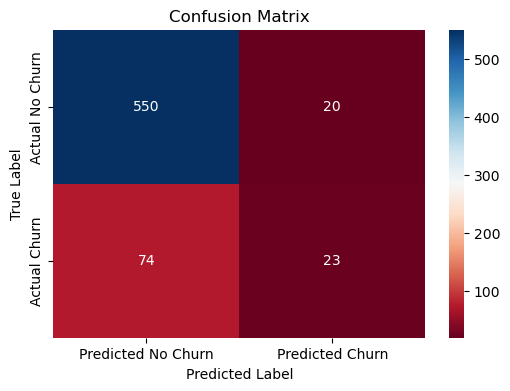

In [218]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




 It helps to understand the types of classification errors:

- **True Negatives (Top-left):** Number of non-churn customers correctly predicted as non-churn.
- **False Positives (Top-right):** Number of non-churn customers incorrectly predicted as churn.
- **False Negatives (Bottom-left):** Number of churn customers incorrectly predicted as non-churn.
- **True Positives (Bottom-right):** Number of churn customers correctly predicted as churn.



## Decision Tree Classifier

Ttrain a Decision Tree Classifier to predict customer churn. Decision Trees are intuitive and interpretable models that split data into branches based on feature values, allowing us to understand which attributes lead to churn.


In [219]:

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_dt)}")

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Accuracy: 0.9055472263868066
AUC-ROC: 0.7907487791644059



The Decision Tree model shows significantly improved performance compared to Logistic Regression, particularly in identifying churned customers (label `1`).

- **Accuracy**: 90.55% – The overall percentage of correctly classified instances.
- **Precision (Churn = 1)**: 69% – When the model predicts churn, it is correct 69% of the time.
- **Recall (Churn = 1)**: 63% – The model correctly captures 63% of actual churn cases.
- **F1-Score (Churn = 1)**: 66% – A harmonic mean of precision and recall, indicating a decent balance.
- **AUC-ROC**: 0.79 – This indicates a good ability to discriminate between churned and non-churned customers.

The results suggest that the Decision Tree model captures churn patterns better than Logistic Regression, especially in identifying churned users, though further tuning and regularization may still improve recall and reduce overfitting.


 ### Confusion Matrix Visualization

The confusion matrix shows the counts of correct and incorrect predictions made by The Decision Tree model on the test set. 


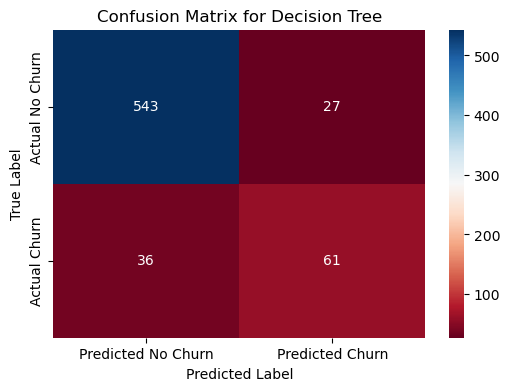

In [220]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

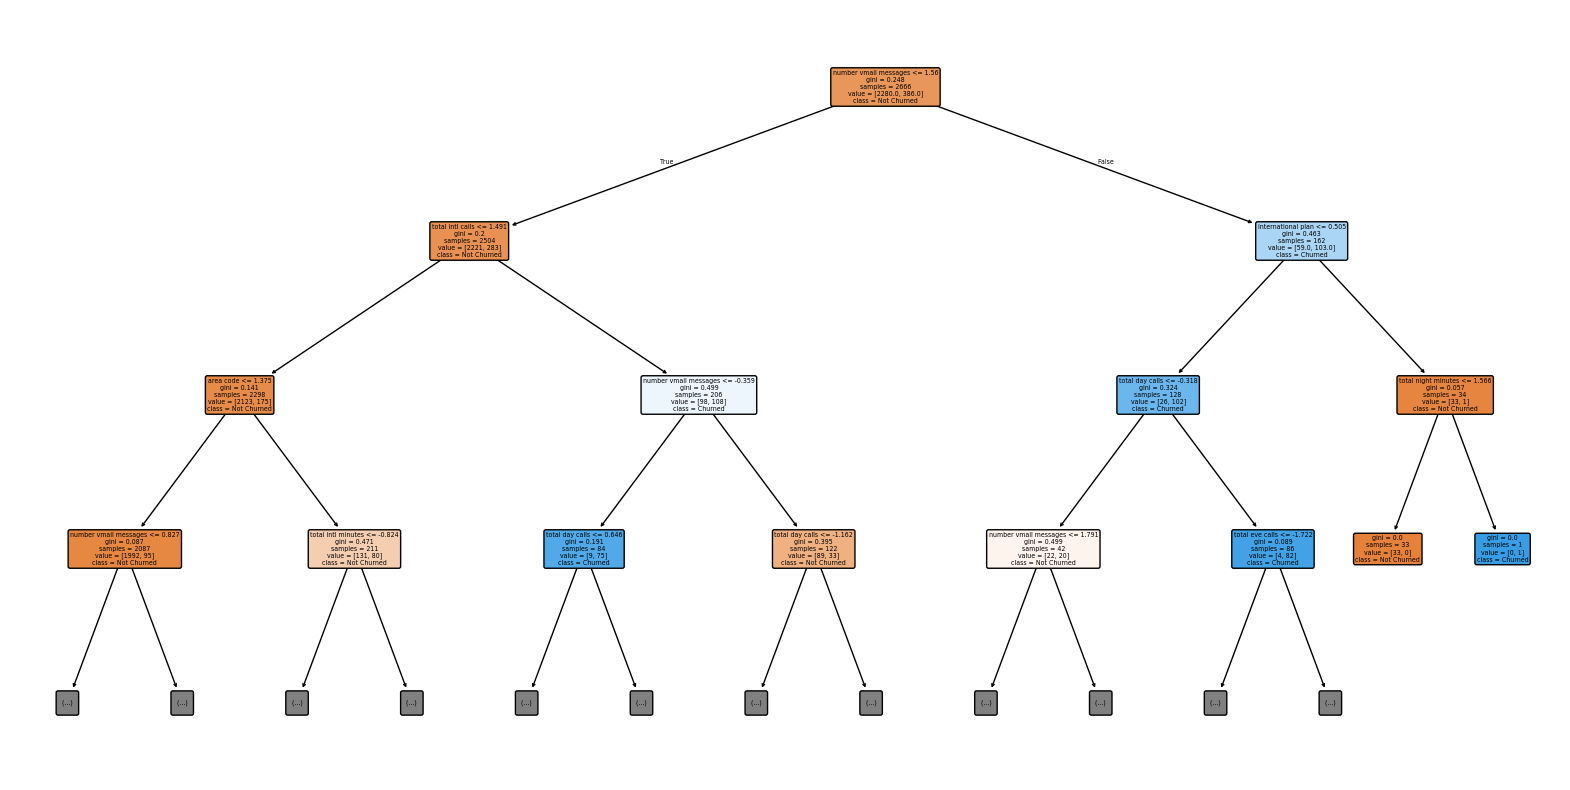

In [221]:
from sklearn.tree import plot_tree

#  dt_model is the trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True, rounded=True)
plt.show()

#### Interpretation

- **Root Node**: Shows the feature and threshold used for the first split.
- **Internal Nodes**: Represent decision points based on different features (e.g., `customer service calls` or `total day minutes`).
- **Leaf Nodes**: Represent the final class prediction (**churned** or **not churned**) along with:
  - Class distribution (samples per class)
  - Gini impurity (measure of purity at the node)
  - Predicted class


### K-Nearest Neighbors (KNN) Classifier
 **Overview:**
- The K-Nearest Neighbors (KNN) algorithm is a non-parametric, instance-based learning model.



KNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       570
           1       0.78      0.29      0.42        97

    accuracy                           0.88       667
   macro avg       0.83      0.64      0.68       667
weighted avg       0.87      0.88      0.86       667

Accuracy: 0.8845577211394303
AUC-ROC: 0.6373123530475673


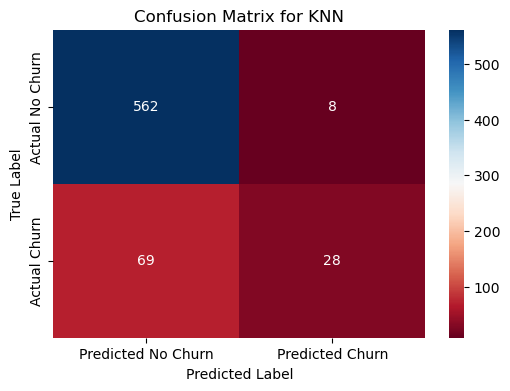

In [222]:
# Initialize the KNN classifier with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Model Evaluation:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_knn)}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### KNN Model Evaluation Results

- **Overall Accuracy**: **88.46%** – The model performs well in predicting the correct class overall.
- **AUC-ROC Score**: **0.637** – Indicates moderate ability to distinguish between churners and non-churners.

####  Class-Wise Performance:
- **Class 0 (Not Churned)**:
  - Precision: **0.89**
  - Recall: **0.99**
  - F1-Score: **0.94**
- **Class 1 (Churned)**:
  - Precision: **0.78**
  - Recall: **0.29**
  - F1-Score: **0.42**



### Hyperparameter Tuning

###  Tuned Decision Tree Classifier

To enhance the performance of the basic decision tree model, hyperparameter tuning is applied using parameters such as:

- **`max_depth`**: Limits the depth of the tree to prevent overfitting.
- **`min_samples_split`**: Sets the minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: Ensures each leaf has a minimum number of samples.
- **`criterion`**: Defines the function used to measure the quality of a split (e.g., `gini` or `entropy`).



In [223]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best AUC-ROC score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

print("Best Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best_dt)}")

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best AUC-ROC score for Decision Tree: 0.886281700755385
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8270482908301682


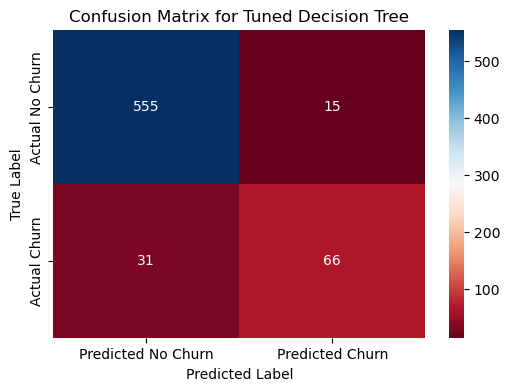

In [224]:
cm = confusion_matrix(y_test, y_pred_best_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Tuned Decision Tree Classifier Results

After performing hyperparameter tuning, the best parameters found for the Decision Tree model are:

- `max_depth`: None (allows the tree to grow until all leaves are pure or contain fewer than min_samples_split samples)
- `min_samples_leaf`: 2 (each leaf must have at least 2 samples)
- `min_samples_split`: 10 (a node must have at least 10 samples to be split)

The tuned model achieved a significant improvement in performance, with:

- **Accuracy:** 93.1%
- **AUC-ROC:** 0.83, showing better separation between classes
- Improved precision, recall, and F1-score especially for the churn class (class 1), with recall increasing to 68%, indicating better identification of churners.

This shows that tuning helps balance the model's complexity and generalization ability, resulting in more reliable predictions for churn.


## Model Evaluation

This section summarizes the performance metrics of the models trained to predict customer churn.




Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Accuracy: 0.8590704647676162
AUC-ROC: 0.601012841381805


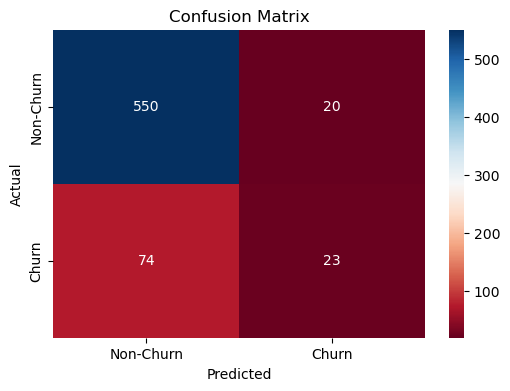


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Accuracy: 0.9055472263868066
AUC-ROC: 0.7907487791644059


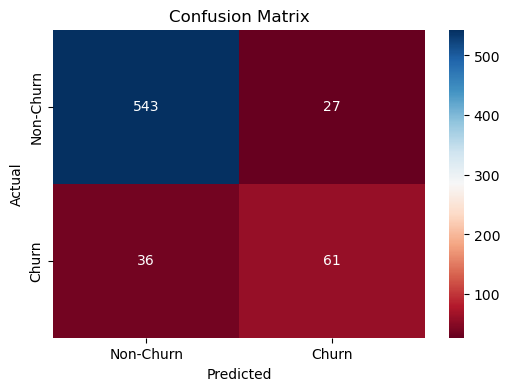


Tuned Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8270482908301682


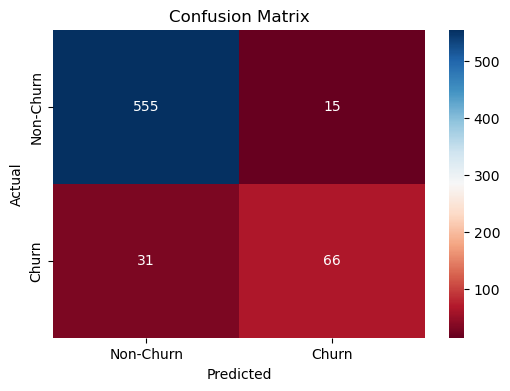

(0.9310344827586207, np.float64(0.8270482908301682))

In [225]:
# Model Evaluation 
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"AUC-ROC: {roc_auc}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Adjust figure size
    sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
                xticklabels=["Non-Churn", "Churn"],
                yticklabels=["Non-Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    return accuracy, roc_auc


# Evaluate Logistic Regression
print("\nLogistic Regression Evaluation:")
evaluate_model(logreg_model, X_test, y_test)

# Evaluate Decision Tree
print("\nDecision Tree Evaluation:")
evaluate_model(dt_model, X_test, y_test)

# Evaluate Tuned Decision Tree
print("\nTuned Decision Tree Evaluation:")
evaluate_model(best_dt_model, X_test, y_test)



The models trained to predict customer churn.

### Logistic Regression
- Accuracy: ~86%
- AUC-ROC: ~0.60
- Strength: Good overall accuracy but low recall for the churn class, meaning many churners were missed.
  
### Decision Tree (Default)
- Accuracy: ~91%
- AUC-ROC: ~0.79
- Strength: Improved recall and precision for churn class compared to logistic regression.

### K-Nearest Neighbors (k=5)
- Accuracy: ~88%
- AUC-ROC: ~0.64
- Strength: High precision for non-churners but low recall for churners.

### Tuned Decision Tree
- Accuracy: ~93%
- AUC-ROC: ~0.83
- Strength: Best overall model with balanced precision and recall, especially better at correctly identifying churners.

### Confusion Matrices & ROC Curves
- Visualize the trade-offs between precision and recall.
- Highlight the importance of selecting models that reduce false negatives in churn prediction.

### Conclusion
- Tuned Decision Tree provides the best balance between accuracy and churn detection.
- Further improvements can be explored via ensemble methods or additional feature engineering.


## GridSearchCV with 5-fold cross-validation.



In [226]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best AUC-ROC score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = grid_search_dt.best_estimator_ #This line assigns the tuned model to 'best_dt_model'
y_pred_best_dt = best_dt_model.predict(X_test)

print("Best Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best_dt)}")

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best AUC-ROC score for Decision Tree: 0.886281700755385
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8270482908301682


#### Best Decision Tree Model Performance Summary

- **Best parameters:**  
  - `max_depth`: None (no limit on tree depth)  
  - `min_samples_leaf`: 2 (minimum samples per leaf)  
  - `min_samples_split`: 10 (minimum samples to split a node)  

- **Cross-validated AUC-ROC:** 0.8863  

- **Test Set Evaluation:**  
  - **Accuracy:** 93.1%  
  - **Precision:**  
    - No Churn: 95%  
    - Churn: 81%  
  - **Recall:**  
    - No Churn: 97%  
    - Churn: 68%  
  - **F1-Score:**  
    - No Churn: 96%  
    - Churn: 74%  
  - **AUC-ROC:** 0.827  



In [227]:
# LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  # Make sure X_train and y_train are defined


LogisticRegression()

In [228]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For AUC

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8590704647676162
Precision: 0.5348837209302325
Recall: 0.23711340206185566
F1 Score: 0.32857142857142857
AUC: 0.8165491047205642
[[550  20]
 [ 74  23]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



#### Model Evaluation Summary

The model was evaluated on the test set using various classification metrics. Below are the key results:

####  Performance Metrics:
- **Accuracy:** 85.9%
- **Precision (Churn):** 53.5%
- **Recall (Churn):** 23.7%
- **F1 Score (Churn):** 32.9%
- **AUC-ROC Score:** 0.82

#

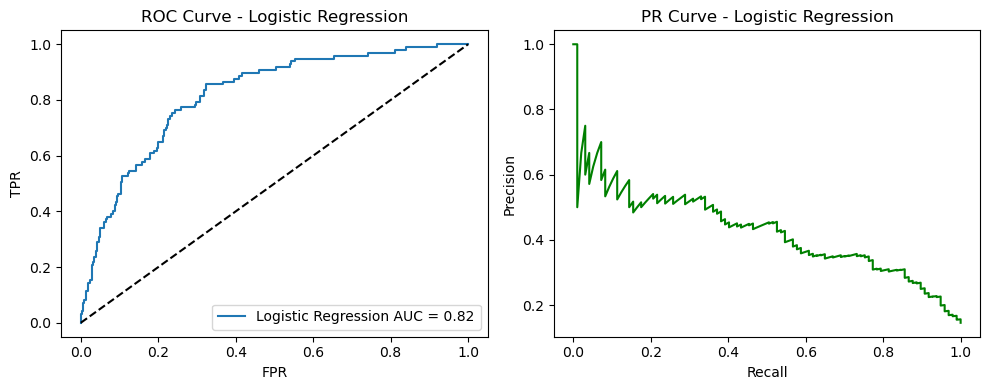

In [229]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

models = {'Logistic Regression': logreg_model}

for name, model in models.items():
    prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    precision, recall, _ = precision_recall_curve(y_test, prob)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green')
    plt.title(f'PR Curve - {name}')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.tight_layout()
    plt.show()


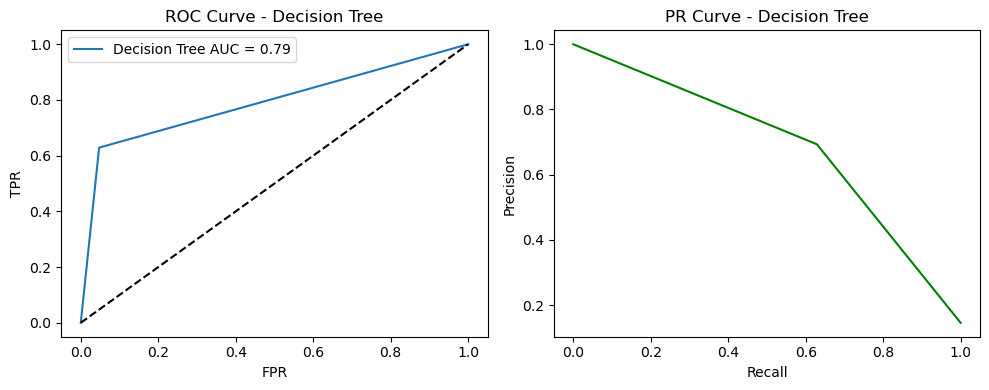

In [230]:

models = {'Decision Tree': dt_model }

for name, model in models.items():
    prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    precision, recall, _ = precision_recall_curve(y_test, prob)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green')
    plt.title(f'PR Curve - {name}')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.tight_layout()
    plt.show()


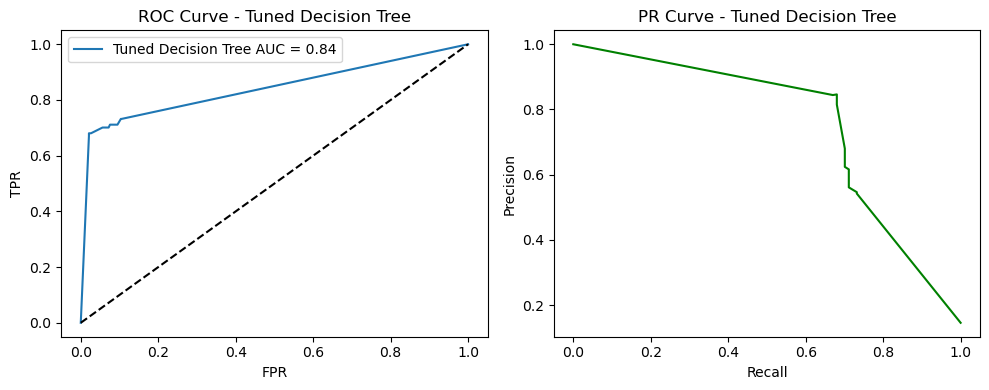

In [231]:

models = {'Tuned Decision Tree': best_dt_model}

for name, model in models.items():
    prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    precision, recall, _ = precision_recall_curve(y_test, prob)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green')
    plt.title(f'PR Curve - {name}')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.tight_layout()
    plt.show()


#### ROC and Precision-Recall Curves for Models

The following visualizations compare the performance of the Logistic Regression, Decision Tree, and Tuned Decision Tree models using:

- **ROC Curve (Receiver Operating Characteristic):**  
  Plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.  
  The Area Under the Curve (AUC) summarizes the model’s ability to distinguish between classes (higher is better).

- **Precision-Recall Curve:**  
  Shows the tradeoff between precision (positive predictive value) and recall (sensitivity) for different thresholds.  
  This curve is especially useful for imbalanced datasets where the positive class (churn) is rare.

#### Insights:
- The ROC curve closer to the top-left corner indicates better performance.
- A larger AUC value means a better model in terms of classification.
- The precision-recall curve gives insight on how well the model balances identifying churners without too many false positives.
- Comparing these curves across models helps to select the best model for churn prediction, especially focusing on the positive churn class.

Each plot is presented side-by-side for ease of comparison.


---
# Churn Prevention Strategy Roadmap

A structured plan to reduce customer churn by leveraging data insights, targeted interventions, and continuous monitoring.

---


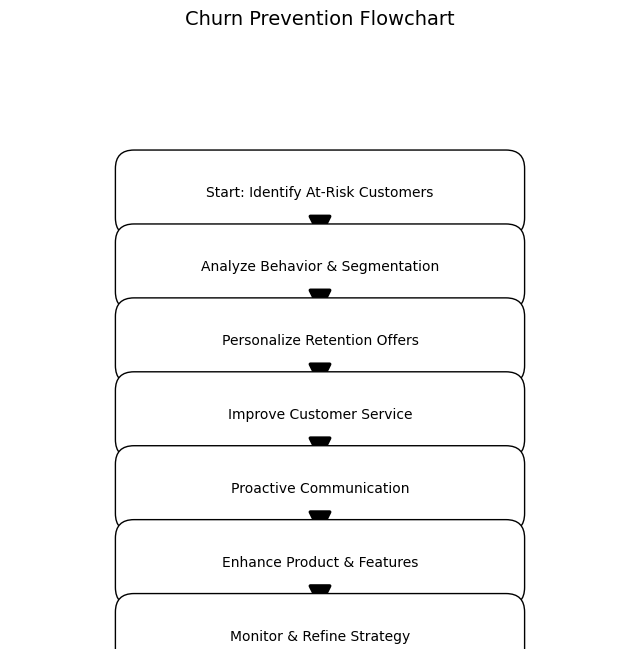

In [232]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

def simple_churn_flowchart():
    steps = [
        "Start: Identify At-Risk Customers",
        "Analyze Behavior & Segmentation",
        "Personalize Retention Offers",
        "Improve Customer Service",
        "Proactive Communication",
        "Enhance Product & Features",
        "Monitor & Refine Strategy"
    ]

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis("off")
    x, y = 2, 7
    w, h, gap = 6, 0.8, 1.2

    for i, step in enumerate(steps):
        ypos = y - i * gap
        ax.add_patch(FancyBboxPatch((x, ypos), w, h, boxstyle="round", ec="black", fc="white"))
        ax.text(x + w/2, ypos + h/2, step, ha="center", va="center", fontsize=10)
        if i < len(steps)-1:
            ax.add_patch(FancyArrowPatch((x + w/2, ypos), (x + w/2, ypos - gap + h),
                                         arrowstyle='-|>', mutation_scale=35, linewidth=2.5, color='black'))

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    plt.title("Churn Prevention Flowchart", fontsize=14)
    plt.show()

simple_churn_flowchart()


---
## **Conclusion and Recommendations**
 ---

### Conclusion  
In this project, I built and evaluated different machine learning models to predict customer churn for a telecom company. The Tuned Decision Tree model gave the best results, with about 93% accuracy and an AUC-ROC score of 0.83, which means it does a good job distinguishing between customers who will churn and those who won’t.

I went through all the important steps like cleaning the data, encoding categorical variables, scaling features, and tuning the model parameters to get the best performance. I also used different evaluation metrics to understand how well the model performs, especially given the imbalance between churned and non-churned customers.

Visualizing the ROC and Precision-Recall curves helped me see how the model balances between catching true churners and avoiding false alarms, which is really important for targeting retention efforts.

### Recommendations  
- I recommend deploying the Tuned Decision Tree model to identify customers likely to churn so that the company can reach out to them proactively.  
- Creating personalized offers or loyalty programs based on these predictions can help keep customers from leaving.  
- Adding more data sources, like customer complaints or social media feedback, might improve the model further.  
- It would be worth trying ensemble models like Random Forest or XGBoost to see if they can boost accuracy even more.  
- The model should be retrained regularly to stay up to date as customer behavior changes over time.  
- Depending on the business goals, it’s important to adjust the model to either catch more churners or reduce false alarms.  
- Finally, integrating this model into the company’s CRM and marketing tools will help automate the process of reaching out to at-risk customers quickly.


